* we will learn how to perform kmeans clustering using scikit-learn in python
* we will use cluster analysis to generate a big picture model of the weather at a a local station using a minute-granularity-data.

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [8]:
data=pd.read_csv("../data/weather.zip", compression="zip")

print("Data shape: ", data.shape)
print("Sample Data \n", data.head())

Data shape:  (1587257, 13)
Sample Data 
    rowID     hpwren_timestamp  air_pressure  air_temp  avg_wind_direction  \
0      0  2011-09-10 00:00:49         912.3     64.76                97.0   
1      1  2011-09-10 00:01:49         912.3     63.86               161.0   
2      2  2011-09-10 00:02:49         912.3     64.22                77.0   
3      3  2011-09-10 00:03:49         912.3     64.40                89.0   
4      4  2011-09-10 00:04:49         912.3     64.40               185.0   

   avg_wind_speed  max_wind_direction  max_wind_speed  min_wind_direction  \
0             1.2               106.0             1.6                85.0   
1             0.8               215.0             1.5                43.0   
2             0.7               143.0             1.2               324.0   
3             1.2               112.0             1.6                12.0   
4             0.4               260.0             1.0               100.0   

   min_wind_speed  rain_accumulat

## Minute Weather Data Description
* this data comes from the weather station. The weather data is equipped with sensors that capture weather related measurements such as air temperature, air pressure and relative humidity. Data was collected for a period of 3 years, from september 2011 to september 2014.
* Each row in minute_weather.csv contains weather data captured for one-minute interval. Each row consists of following variable
    * rowID: unique no for each row
    * hpwren_timestamp: time stamp of measure (Unit: year:month:day hour:minute:second)
    * air_pressure: air pressure measured at the timestamp (Unit: hectopascals)
    * air_temp: air temperature measure at the time stamp(Unit: degrees Fahreinheit)
    * avg_wind_direction: wind direction averaged over the minute before the timestamp(Unit:degrees, with 0 means coming from the north, and increasing clockwise)
    * avg_wind_speed: wind speed averaged over the minute before the timestamp (Unit: meters per second)
    * max_wind_direction: highest wind direction in the minute before the timestamp(Unit: degrees, with 0 means coming from the north, and increasing clockwise)
    * max_wind_speed: highest wind speed over the minute before the timestamp (Unit: meters per second)
    * min_wind_direction: smallest wind direction in the minute before the timestamp(Unit: degrees, with 0 means coming from the north, and increasing clockwise)
    * min_wind_speed: smallest wind speed over the minute before the timestamp (Unit: meters per second)
    * rain_accumulation: amount of accumulated rain measured at the timestamp(Unit: millimeters)
    * rain_duration: length of time rain has fallen as measured at the timestamp(Unit: seconds)
    * relative_humidity: relative humidity measured at the timestamp(Unit: percent)

In [9]:
# Data Sampling
# lots of rows so lets sample down by taking every 10th row
sampled_df=data[data['rowID']%10==0]
print("Sample Data shape: ", sampled_df.shape)

# statistics
sampled_df.describe().transpose()

print("data with 0 rain accumulation:\n ",sampled_df[sampled_df["rain_accumulation"]==0].shape)
print("data with 0 rain duration: \n", sampled_df[sampled_df["rain_duration"]==0].shape)

del sampled_df["rain_accumulation"]
del sampled_df["rain_duration"]

rows_before=sampled_df.shape[0]
sampled_df=sampled_df.dropna()
rows_after=sampled_df.shape[0]


print("How many rows did we drop: ", rows_after-rows_before)
print("columns in sample data: ", sampled_df.columns)

# select features of interest for clustering
features=['air_pressure', "air_temp", "avg_wind_direction", "avg_wind_speed", "max_wind_direction", "max_wind_speed", "relative_humidity"]

select_df=sampled_df[features]
print("the selected features are: ", select_df.columns)
print("it's the head of the data \n", select_df.head())


# scale the features using standardscaler
X=StandardScaler().fit_transform(select_df)
print("X= ", X)

# use K Means Clustering
k_means=KMeans(n_clusters=12)
model=k_means.fit(X)
print("model=\n", model)


# what are the centers of 12 clusters we formed
centers=model.cluster_centers_
print("centers= ", centers)

Sample Data shape:  (158726, 13)
data with 0 rain accumulation:
  (157812, 13)
data with 0 rain duration: 
 (157237, 13)
How many rows did we drop:  -46
columns in sample data:  Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')
the selected features are:  Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')
it's the head of the data 
     air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
0          912.3     64.76                97.0             1.2   
10         912.3     62.24               144.0             1.2   
20         912.2     63.32               100.0             2.0   
30         912.2     62.60                91.0             2.0   
40         912.2     

In [12]:
# Plots
# let us first create some utility functions which will help us in plotting graphs:

# function that creates a dataframe with a column for cluster no

def pd_centers(featuresUsed, centers):
    colNames=list(featuresUsed)
    colNames.append("prediction")
    
#     Zip with a column called prediction
    Z=[np.append(A, index) for index, A in enumerate(centers)]
    
#     convert to pandas dataframe for plotting
    P=pd.DataFrame(Z, columns=colNames)
    
    P["prediction"]=P["prediction"].astype(int)
    return P

# function that creates parallel plots
def parallel_plots(data):
    my_colors=list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15, 8)).gca().axes.set_ylim([-3, +3])
    parallel_coordinates(data, "prediction", color=my_colors, marker="o")
    plt.show()
    
    
P=pd_centers(features, centers)
print("pd centers: ", P)


pd centers:      air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
0       0.128113  0.845923            1.411910       -0.638791   
1       1.364821 -0.080730           -1.208476       -0.054117   
2      -0.214518  0.634322            0.408281        0.733121   
3      -0.843321 -1.199975            0.376297        0.390157   
4       0.761449  0.396902            0.294795       -0.525773   
5       1.190866 -0.254154           -1.154842        2.119297   
6       0.217087 -0.998560            0.650655       -0.545810   
7       0.233992  0.320021            1.887919       -0.651769   
8       0.056354 -0.785956           -1.196021       -0.570759   
9      -1.182304 -0.865061            0.446743        1.991094   
10     -0.164374  0.864668           -1.309936       -0.590031   
11     -0.678260  0.565655            0.180001       -0.588349   

    max_wind_direction  max_wind_speed  relative_humidity  prediction  
0             1.676052       -0.589777          -0.71228

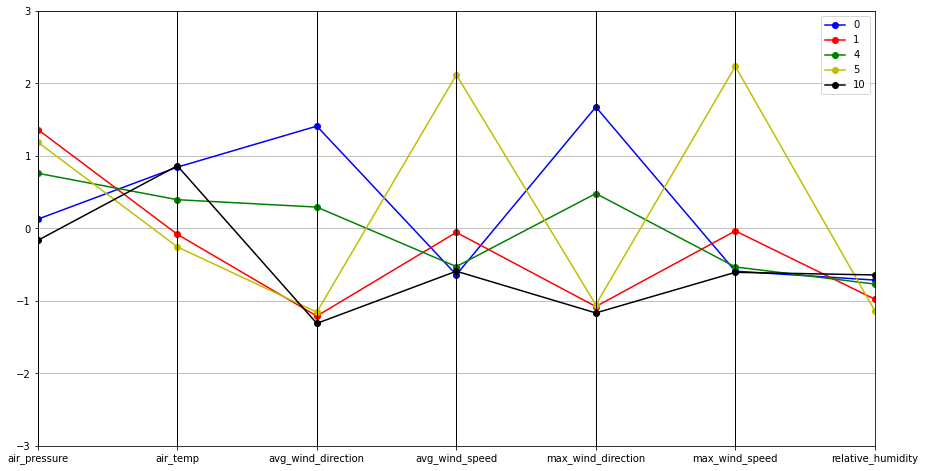

In [19]:
parallel_plots(P[P['relative_humidity']<-0.5])

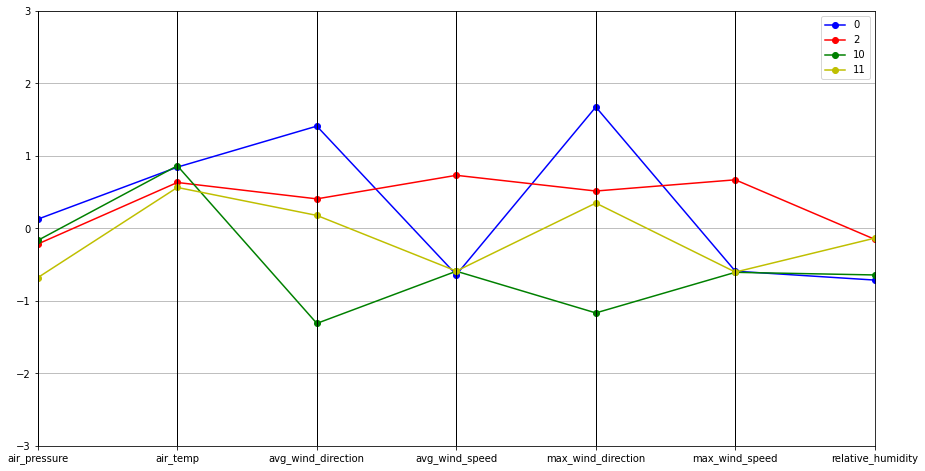

In [20]:
parallel_plots(P[P['air_temp']>0.5])

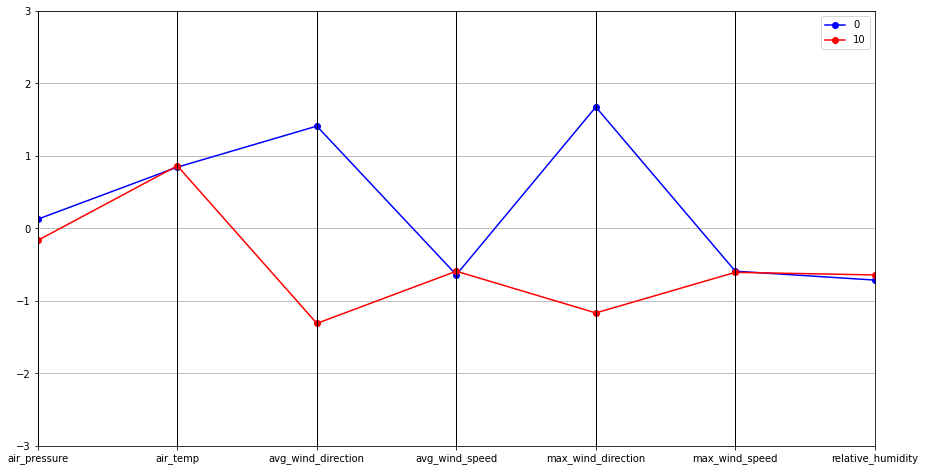

In [24]:
parallel_plots(P[(P['air_temp']>0.5) & (P['relative_humidity']<-0.5)])